### Modeling of data for prediction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('clean_data.csv')

In [4]:
data

,Unnamed: 0,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1.0
991,992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1.0
992,993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1.0
993,994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  995 non-null    int64  
 1   Gender      995 non-null    int64  
 2   AGE         995 non-null    int64  
 3   Urea        995 non-null    float64
 4   Cr          995 non-null    int64  
 5   HbA1c       995 non-null    float64
 6   Chol        995 non-null    float64
 7   TG          995 non-null    float64
 8   HDL         995 non-null    float64
 9   LDL         995 non-null    float64
 10  VLDL        995 non-null    float64
 11  BMI         995 non-null    float64
 12  CLASS       995 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 101.2 KB


In [5]:
data = data.drop('Unnamed: 0', axis=True)

In [6]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


In [7]:
X =  data.drop('CLASS', axis= True)
y =  data['CLASS']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CLASS, dtype: float64

#### split the data into training and testing  

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
X_test.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
920,1,51,4.4,57,11.3,9.8,1.9,1.1,7.9,0.8,37.00
525,1,66,5.5,73,10.9,9.3,5.1,0.9,6.4,35.0,27.75
567,1,55,6.5,72,7.4,4.4,1.3,1.0,2.5,0.9,35.00
657,0,67,3.2,38,8.7,5.0,3.0,1.1,2.7,1.3,30.00
633,0,53,3.3,48,12.8,5.1,3.0,0.9,2.9,1.3,37.00


In [10]:
RF_model = RandomForestClassifier(max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [11]:
RF_model.score(X_test, y_test)

0.9431438127090301

In [12]:
RF_model_2 = RandomForestClassifier(max_depth=3, random_state=0)
RF_model_2.fit(X_train, y_train)
RF_model_2.score(X_test, y_test)

0.9899665551839465

In [13]:
acc = RF_model_2.score(X_test, y_test)
acc * 100

98.99665551839465

In [14]:
RF_model_2.score(X_train, y_train)

0.9827586206896551

In [15]:
RF_model_2.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

In [16]:
np.array(y_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

In [17]:
prediction =  RF_model_2.predict(X_test)
prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       2., 1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

In [27]:
cm = confusion_matrix(y_test, prediction)

#### Ploting the confution matrix

In [28]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_data = pd.DataFrame(cm,
                     index = ['None','Diabetic','Pre-Diabetic'], 
                     columns = ['None','Diabetic','Pre-Diabetic'])

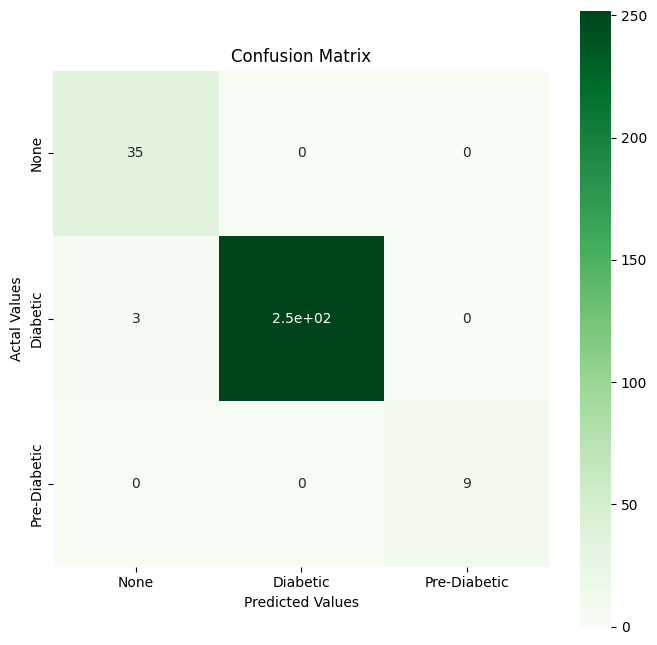

In [30]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_data, cmap= 'Greens', annot=True)
plt.imshow(cm_data, cmap='hot')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


In [44]:
input= [[1,23,5,41,6,3,1,3,2,1,24]]

In [45]:
output= RF_model_2.predict(input)

/home/gershon/Documents/Miriam_Project/code/AI_dietician/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
print(output[0])

2.0


In [52]:
import pickle
pickle.dump(RF_model_2,open('random_f2.pkl','wb'))

In [53]:
b = [1, 2, 3]

In [55]:
data?

Type:        DataFrame
String form:
Gender  AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  CLASS
           0         0   50   4.7 <...> 4       1   71  11.0   97    7.0   7.5  1.7  1.2  1.8   0.6  30.0    1.0
           
           [995 rows x 12 columns]
Length:      995
File:        ~/Documents/Miriam_Project/code/AI_dietician/lib/python3.10/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is ali